<a href="https://colab.research.google.com/github/iair/financial_health/blob/main/financial_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: importa las librerias pandas, numbpy, matplotlib, seaborn, os, request, json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json


In [2]:
url = "https://api.floid.app/cl/banco_itau_personas/products"

payload = {
    "id": rut,
    "password": password,
    "unlock_credentials": False
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "authorization": token
}

response = requests.post(url, json=payload, headers=headers)

print(response.text)

{"code":"200","msg":"OK","caseid":"8b9a7527-d466-468c-8289-0e510e5d284c","products":{"accounts":[{"type":"corriente","number":223635815,"currency":"CLP","balance":4687}],"cards":[{"number":"**6012","type":"credito","name":"Mastercard Black Pb","CLP":{"total":7000000,"used":5990805,"available":1009195},"USD":{"total":875833,"used":2563,"available":87327}}],"lines":[{"number":223635825,"CLP":{"total":1000000,"used":0,"available":1000000}}]}}


In [7]:
response_dict = json.loads(response.text)
response_dict.keys()

dict_keys(['code', 'msg', 'caseid', 'products'])

In [22]:
account_number = response_dict.get('products').get('accounts')[0].get('number')

In [42]:
url = "https://api.floid.app/cl/banco_itau_personas/transactions"

payload = {
    "id": rut,
    "password": password,
    "account_number": account_number,
    "history": True
}

response = requests.post(url, json=payload, headers=headers)

print(response.text)

{"code":"200","msg":"Ok","caseid":"2b9edaae-9957-42f3-9b96-14eecc36eda5","transactions":[{"date":"2024-01-02","branch":null,"description":"Transferencia A Daniela Silva","doc_number":"333735497","out":8096,"in":0,"balance":3490188,"id":"2891b1654ddbf44fb75bea431c57ee161"},{"date":"2024-01-02","branch":null,"description":"Transferencia A Paulina Oreall","doc_number":"333896469","out":3000,"in":0,"balance":3487188,"id":"d98e1821aea3249c129a660fcf37bca01"},{"date":"2024-01-04","branch":null,"description":"Transferencia A Spot Vista Los","doc_number":"334778753","out":1285880,"in":0,"balance":2201308,"id":"930984c1728026fe8a84a1cb64dcf6451"},{"date":"2024-01-05","branch":null,"description":"Transferencia A Floid Spa","doc_number":"334849615","out":191473,"in":0,"balance":2009835,"id":"82abce1fa9b42ae01258d02bdb1e12dd1"},{"date":"2024-01-05","branch":null,"description":"Transferencia A Germanie","doc_number":"334893597","out":120000,"in":0,"balance":1889835,"id":"100ea58aa1bb08fb1b7e3803377

In [43]:
response_dict = json.loads(response.text)
response_dict.keys()

dict_keys(['code', 'msg', 'caseid', 'transactions'])

In [44]:
transactions = response_dict.get('transactions')
type(transactions)

list

In [45]:
print(len(transactions))
transactions[0]

57


{'date': '2024-01-02',
 'branch': None,
 'description': 'Transferencia A Daniela Silva',
 'doc_number': '333735497',
 'out': 8096,
 'in': 0,
 'balance': 3490188,
 'id': '2891b1654ddbf44fb75bea431c57ee161'}

In [46]:
# prompt: genera un dataframe con todas las transacciones en transactions
df = pd.DataFrame(transactions)
df.head()

,date,branch,description,doc_number,out,in,balance,id
0,2024-01-02,None,Transferencia A Daniela Silva,333735497,8096,0,3490188,2891b1654ddbf44fb75bea431c57ee161
1,2024-01-02,None,Transferencia A Paulina Oreall,333896469,3000,0,3487188,d98e1821aea3249c129a660fcf37bca01
2,2024-01-04,None,Transferencia A Spot Vista Los,334778753,1285880,0,2201308,930984c1728026fe8a84a1cb64dcf6451
3,2024-01-05,None,Transferencia A Floid Spa,334849615,191473,0,2009835,82abce1fa9b42ae01258d02bdb1e12dd1
4,2024-01-05,None,Transferencia A Germanie,334893597,120000,0,1889835,100ea58aa1bb08fb1b7e38033771b28d1


In [47]:
print(min(df.date))
max(df.date)

2024-01-02


'2024-02-20'

<ipython-input-48-add93963112f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


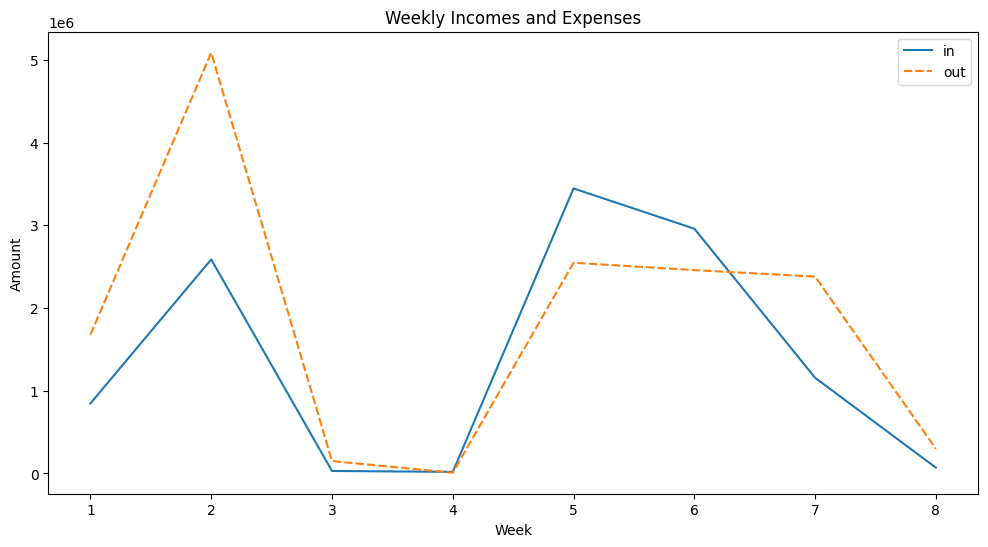

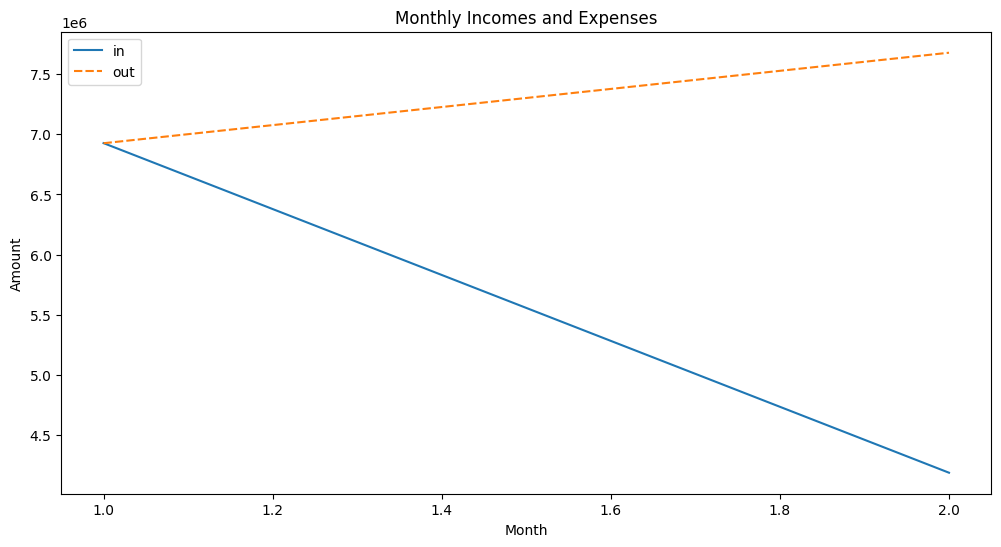

In [48]:
# prompt: crea un gráfico que me muestre los egresos (usando la columna out) vs los ingresos (usando la columna in) a lo largo del tiempo con granularidad semanal y otro mensual

df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.week
df['month'] = df['date'].dt.month

# Create a pivot table for weekly data
weekly_pivot = df.pivot_table(values=['in', 'out'], index='week', aggfunc=sum)

# Create a line plot for weekly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_pivot)
plt.title('Weekly Incomes and Expenses')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.show()

# Create a pivot table for monthly data
monthly_pivot = df.pivot_table(values=['in', 'out'], index='month', aggfunc=sum)

# Create a line plot for monthly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pivot)
plt.title('Monthly Incomes and Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()


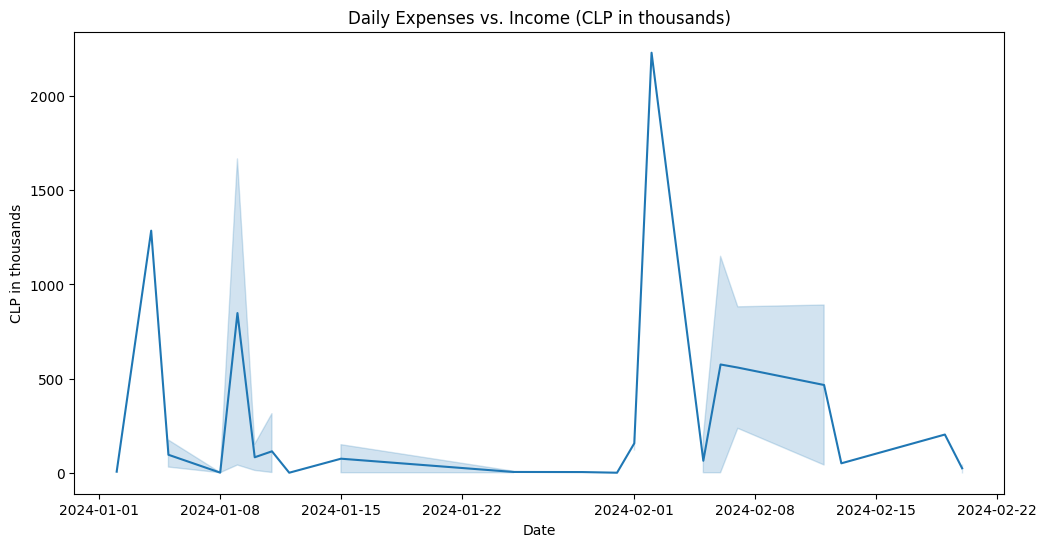

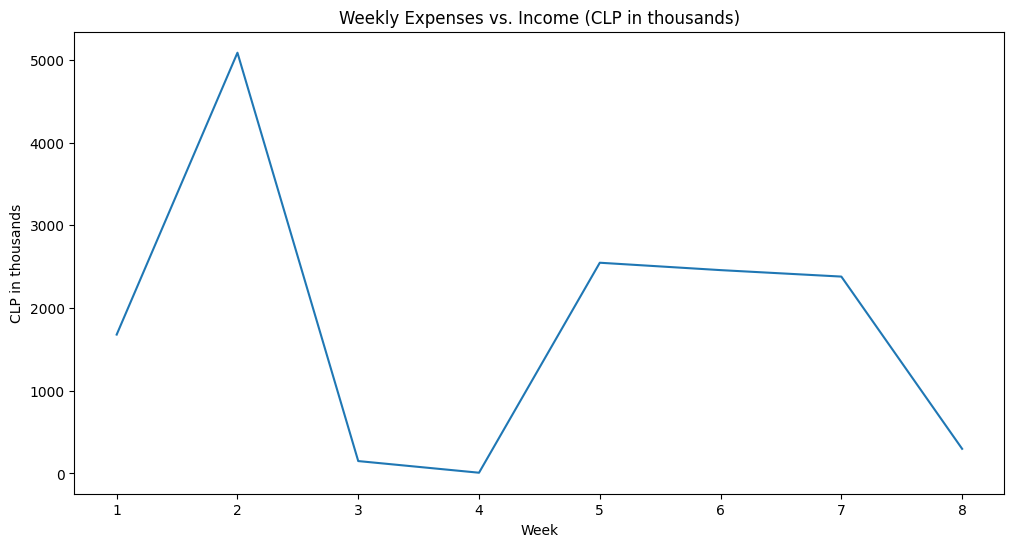

In [56]:
# prompt: crea dos gráfico que me muestre los egresos (usando la columna out) vs los ingresos (usando la columna in) a lo largo del tiempo usando la variable date para el tiempo. Usa unidades de mil  para el eje Y y que el eje se llame "CLP en miles"

import matplotlib.pyplot as plt
# Create a new column for CLP in thousands
df['clp_thousands'] = df['out'] / 1000

# Create a line plot for daily data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='clp_thousands')
plt.title('Daily Expenses vs. Income (CLP in thousands)')
plt.xlabel('Date')
plt.ylabel('CLP in thousands')
plt.show()

# Create a pivot table for weekly data
weekly_pivot = df.pivot_table(values=['in', 'out'], index='week', aggfunc=sum)

# Create a new column for CLP in thousands
weekly_pivot['clp_thousands'] = weekly_pivot['out'] / 1000

# Create a line plot for weekly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_pivot, x='week', y='clp_thousands')
plt.title('Weekly Expenses vs. Income (CLP in thousands)')
plt.xlabel('Week')
plt.ylabel('CLP in thousands')
plt.show()


<ipython-input-85-1d2760748d32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_net['net_income'] = df_net['clp_thousands_in'] - df_net['clp_thousands_out']


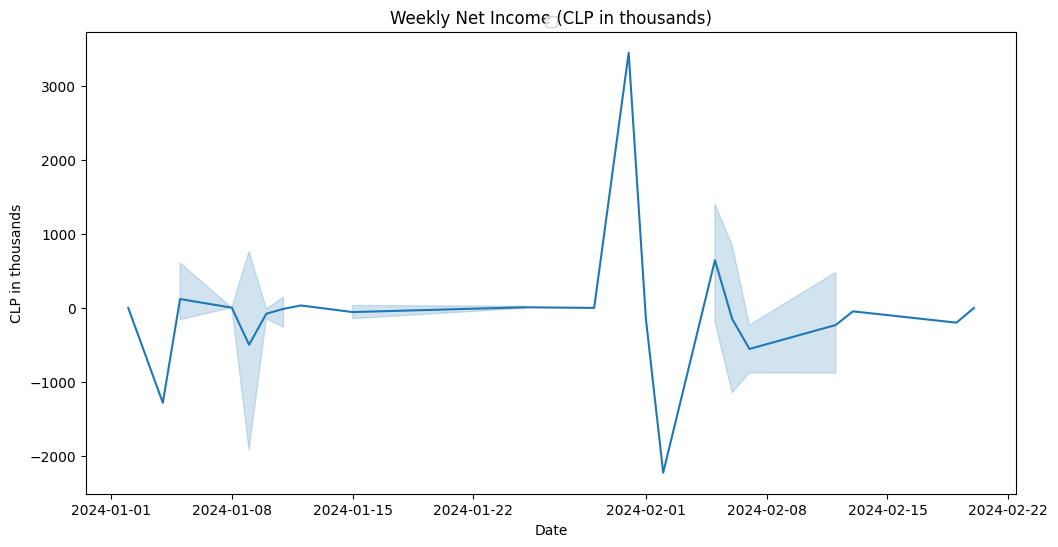

In [85]:
# prompt: # prompt: crea un gráfico de linea que me muestre el resultado neto de restar los egresos (usando la columna out en unidades de miles) vs los ingresos (usando la columna in en unidades de miles) a lo largo del tiempo usando la variable date para el tiempo con granularidad semanal. Que aparezcan las etiquetas al centro . La leyenda debe estar arriba redondeada

import matplotlib.pyplot as plt
df['clp_thousands_in'] = df['in'] / 1000
df['clp_thousands_out'] = df['out'] / 1000

# Create a new dataframe with the desired columns
df_net = df[['date', 'clp_thousands_in', 'clp_thousands_out']]

# Calculate the net income for each week
df_net['net_income'] = df_net['clp_thousands_in'] - df_net['clp_thousands_out']

# Create a line plot for weekly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_net, x='date', y='net_income')
plt.title('Weekly Net Income (CLP in thousands)')
plt.xlabel('Date')
plt.ylabel('CLP in thousands')

# Annotate the plot with labels
for i, row in df_net.iterrows():
    plt.annotate(str(row['net_income']), (i, row['net_income']), ha='center', va='center')

# Add legend and adjust its position
plt.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=1)

# Show the plot
plt.show()


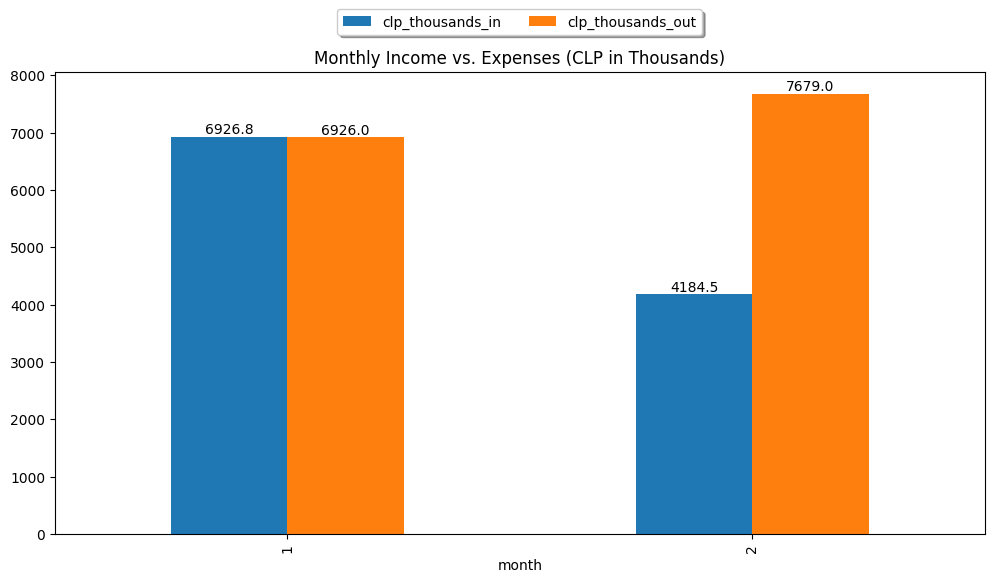

In [78]:
# prompt: # prompt: crea un gráfico de barras comparado que me muestre el la diferencia entre los egresos (usando la columna out en unidades de miles) vs los ingresos (usando la columna in en unidades de miles) a lo largo del tiempo usando la variable date para el tiempo con granularidad de meses. Que aparezcan las etiquetas al centro . La leyenda debe estar arriba redondeada

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for CLP in thousands
df['clp_thousands_in'] = df['in'] / 1000
df['clp_thousands_out'] = df['out'] / 1000

# Create a pivot table for monthly data
monthly_pivot = df.pivot_table(values=['clp_thousands_in', 'clp_thousands_out'], index='month', aggfunc=sum)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

monthly_pivot.plot(kind='bar', ax=ax, title='Monthly Income vs. Expenses (CLP in Thousands)', legend=False)

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            str(round(bar.get_height(), 1)), ha='center', va='bottom')

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True)

# Show the plot
plt.show()


<ipython-input-86-b5533527af3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_net['net_income_cumulative'] = df_net['net_income'].cumsum()


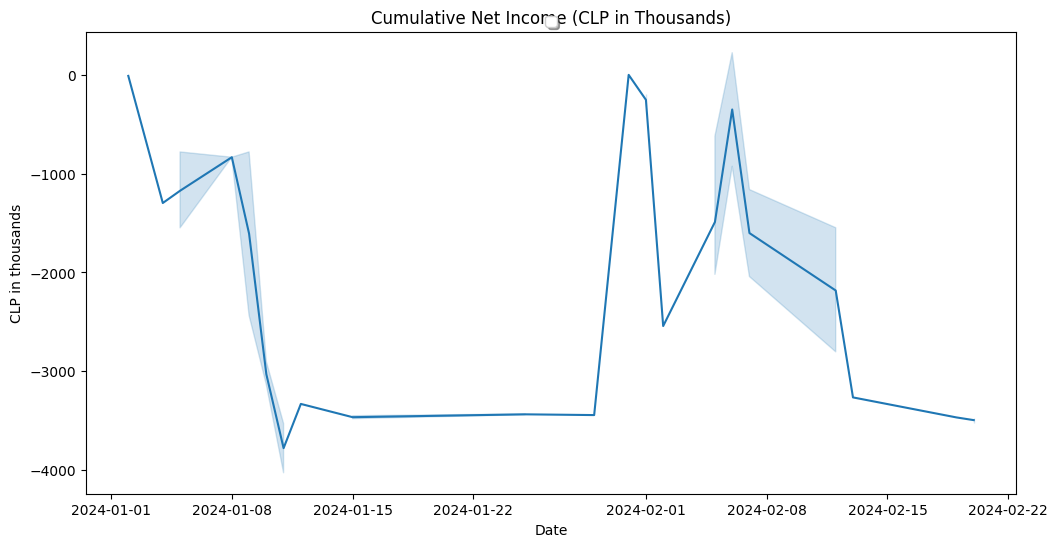

In [86]:
# prompt: crea un gráfico de linea que me muestre el resultado neto acumulado de restar los egresos (usando la columna out en unidades de miles) vs los ingresos (usando la columna in en unidades de miles) a lo largo del tiempo usando la variable date para el tiempo con granularidad semanal. Que aparezcan las etiquetas al centro . La leyenda debe estar arriba redondeada

import matplotlib.pyplot as plt
# Calculate the cumulative sum of net income
df_net['net_income_cumulative'] = df_net['net_income'].cumsum()

# Create a line plot for weekly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_net, x='date', y='net_income_cumulative')
plt.title('Cumulative Net Income (CLP in Thousands)')
plt.xlabel('Date')
plt.ylabel('CLP in thousands')

# Annotate the plot with labels
for i, row in df_net.iterrows():
    plt.annotate(str(row['net_income_cumulative']), (i, row['net_income_cumulative']), ha='center', va='center')

# Add legend and adjust its position
plt.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=1, fancybox=True, shadow=True)

# Show the plot
plt.show()
